In [1]:
import sys
sys.version


'3.7.5 (default, Feb 23 2021, 13:22:40) \n[GCC 8.4.0]'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import g2o

In [3]:
# class PoseGraphOptimization(g2o.SparseOptimizer):
#     def __init__(self):
#         super().__init__()
#         solver = g2o.BlockSolverSE3(g2o.LinearSolverCholmodSE3())
#         solver = g2o.OptimizationAlgorithmLevenberg(solver)
#         super().set_algorithm(solver)

#     def optimize(self, max_iterations=20):
#         super().initialize_optimization()
#         super().optimize(max_iterations)

#     def add_vertex(self, id, pose, fixed=False):
#         v_se3 = g2o.VertexSE3()
#         v_se3.set_id(id)
#         v_se3.set_estimate(pose)
#         v_se3.set_fixed(fixed)
#         super().add_vertex(v_se3)

#     def add_edge(self, vertices, measurement, 
#             information=np.identity(6),
#             robust_kernel=None):

#         edge = g2o.EdgeSE3()
#         for i, v in enumerate(vertices):
#             if isinstance(v, int):
#                 v = self.vertex(v)
#             edge.set_vertex(i, v)

#         edge.set_measurement(measurement)  # relative pose
#         edge.set_information(information)
#         if robust_kernel is not None:
#             edge.set_robust_kernel(robust_kernel)
#         super().add_edge(edge)

#     def get_pose(self, id):
#         return self.vertex(id).estimate()

In [3]:
class PoseGraphOptimization(g2o.SparseOptimizer):
    def __init__(self):
        super().__init__()
        solver = g2o.BlockSolverSE2(g2o.LinearSolverCholmodSE2())
        solver = g2o.OptimizationAlgorithmLevenberg(solver)
        super().set_algorithm(solver)

    def optimize(self, max_iterations=20):
        super().initialize_optimization()
        super().optimize(max_iterations)

    def add_vertex(self, id, pose, fixed=False):
        v_se2 = g2o.VertexSE2()
        v_se2.set_id(id)
        v_se2.set_estimate(pose)
        v_se2.set_fixed(fixed)
        super().add_vertex(v_se2)

    def add_edge(self, vertices, measurement, 
            information=np.identity(3),
            robust_kernel=None):

        edge = g2o.EdgeSE2()
        for i, v in enumerate(vertices):
            if isinstance(v, int):
                v = self.vertex(v)
            edge.set_vertex(i, v)

        edge.set_measurement(measurement)
        edge.set_information(information)
        if robust_kernel is not None:
            edge.set_robust_kernel(robust_kernel)
        super().add_edge(edge)

    def get_pose(self, id):
        return self.vertex(id).estimate()

In [5]:
gt = np.array([[0, 0, 0],
               [1, 0, 0],
               [2, 0, 0],
               [3, 0, 0],
               [4, 0, 0],
               [5, 0, 0],
               [5, 0, 0.25],
               [5, 0, 0.5],
               [5, 0, 0.75],
               [5, 0, 1.0],
               [5, 0, 1.25],
               [5, 0, 1.5],
               [5, 0, 1.75],
               [5, 0, 2.0],
               [5, 0, 2.25],
               [5, 0, 2.5],
               [5, 0, 2.75],
               [5, 0, 3.0],
               [5, 0, np.pi],
               [4, 0, np.pi],
               [3, 0, np.pi],
               [2, 0, np.pi],
               [1, 0, np.pi],
               [0, 0, np.pi]
              ])

icp_poses = np.array([[0, 0, 0],
               [0.97, 0, 0.03],
               [2.026,0,  0],
               [3.11, 0, 0.07],
               [4.11, 0, 0],
               [5.11, 0, 0.05],
               [5.11, 0, 0.25],
               [5.11, 0, 0.5],
               [5.11, 0, 0.8],
               [5.11, 0, 1.05],
               [5.11, 0, 1.25],
               [5.11, 0, 1.55],
               [5.11, 0, 1.7],
               [5.11, 0, 2.01],
               [5.11, 0, 2.2],
               [5.11, 0, 2.5],
               [5.11, 0, 2.75],
               [5.11, 0, 3.05],
               [5.11, 0, np.pi],
               [4.13, 0, np.pi],
               [2.998,0,  np.pi],
               [1.86, 0, np.pi],
               [0.81, 0, np.pi],
               [-0.29,0,  np.pi]
              ])

# odo_constraints = np.array([[0.84, 0.0, 0.0],
#                             [0.79, 0.0, 0.0], 
#                             [0.95, 0.0, 0.0], 
#                             [0.97, 0.0, 0.0], 
#                             [0.95, 0.0, 0.0],     
#                            [0, 0, 0.25],
#                            [0, 0, 0.25],
#                            [0, 0, 0.25],
#                            [0, 0, 0.25],
#                            [0, 0, 0.25],
#                            [0, 0, 0.25],
#                            [0, 0, 0.25],
#                            [0, 0, 0.25],
#                            [0, 0, 0.25],
#                            [0, 0, 0.25],
#                            [0, 0, 0.25],
#                            [0, 0, 0.25],
#                             [0, 0, 0.14],      
#                             [0.99, 0.0, 0.0], 
#                             [0.83, 0.0, 0.0],  
#                             [0.98, 0.0, 0.0], 
#                             [0.85, 0.0, 0.0],
#                             [0.96, 0.0, 0.0]])

odo_constraints = np.array([[1.3, 0.0, 0.01],
                            [0.9, 0.0, 0.02], 
                            [0.95, 0.0, -0.02], 
                            [0.97, 0.0, 0.01], 
                            [0.95, 0.0, -0.03],     
                           [0, 0, 0.25],
                           [0, 0, 0.25],
                           [0, 0, 0.25],
                           [0, 0, 0.25],
                           [0, 0, 0.25],
                           [0, 0, 0.25],
                           [0, 0, 0.25],
                           [0, 0, 0.25],
                           [0, 0, 0.25],
                           [0, 0, 0.25],
                           [0, 0, 0.25],
                           [0, 0, 0.25],
                            [0, 0, 0.14],      
                            [0.99, 0.0, 0.0], 
                            [0.83, 0.0, 0.0],  
                            [0.98, 0.0, 0.0], 
                            [0.85, 0.0, 0.0],
                            [0.96, 0.0, 0.0]])

In [6]:
def to_hcpose(pose):
    x, y, yaw = pose[0], pose[1], pose[2]
    hc_pose = np.array([[np.cos(yaw), -np.sin(yaw), x],
                       [np.sin(yaw), np.cos(yaw), y],
                       [0, 0, 1]])
    return hc_pose

In [14]:
optimizer = PoseGraphOptimization()
pose = icp_poses[0]
vertex_idx = 1
optimizer.add_vertex(0, g2o.SE2(g2o.Isometry2d(to_hcpose(pose))), True)
information = np.linalg.inv(0.01*np.eye(3))
rk = g2o.RobustKernelDCS()
for pose, meas in zip(icp_poses[1:], odo_constraints):
    optimizer.add_vertex(vertex_idx, g2o.SE2(g2o.Isometry2d(to_hcpose(pose))))
    optimizer.add_edge([vertex_idx-1, vertex_idx],g2o.SE2(g2o.Isometry2d(to_hcpose(meas))),information, robust_kernel=rk)
    vertex_idx += 1
optimizer.add_edge([vertex_idx-1, 0], g2o.SE2(g2o.Isometry2d(to_hcpose(np.array([0, 0, np.pi])))), information, robust_kernel=rk)

optimizer.add_edge([vertex_idx-2, 1], g2o.SE2(g2o.Isometry2d(to_hcpose(np.array([0, 0, np.pi])))), information, robust_kernel=rk)
optimizer.add_edge([vertex_idx-3, 2], g2o.SE2(g2o.Isometry2d(to_hcpose(np.array([0, 0, np.pi])))), information, robust_kernel=rk)
optimizer.add_edge([vertex_idx-4, 3], g2o.SE2(g2o.Isometry2d(to_hcpose(np.array([0, 0, np.pi])))), information, robust_kernel=rk)
optimizer.add_edge([vertex_idx-5, 4], g2o.SE2(g2o.Isometry2d(to_hcpose(np.array([0, 0, np.pi])))), information, robust_kernel=rk)
optimizer.optimize()
poses = np.array([optimizer.get_pose(idx).to_vector() for idx in range(vertex_idx)])

In [15]:
print(np.linalg.norm(icp_poses - gt, axis=0))
print(np.linalg.norm(poses - gt, axis=0))

[0.59319474 0.         0.15297059]
[ 1.28918995  0.0434866  15.38639222]


In [16]:
poses

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 9.72138160e-01,  1.60571102e-03, -2.92273176e-03],
       [ 1.85585473e+00,  1.19077718e-04,  1.21684467e-02],
       [ 2.80014359e+00,  9.71976402e-03, -3.31441294e-03],
       [ 3.73378599e+00,  7.26639938e-03,  5.41122698e-03],
       [ 4.68400091e+00,  1.21788645e-02, -2.26661297e-02],
       [ 4.68422975e+00,  1.19506892e-02,  2.29256514e-01],
       [ 4.68445858e+00,  1.17225138e-02,  4.81179157e-01],
       [ 4.68468742e+00,  1.14943384e-02,  7.33101800e-01],
       [ 4.68491626e+00,  1.12661630e-02,  9.85024444e-01],
       [ 4.68514509e+00,  1.10379876e-02,  1.23694709e+00],
       [ 4.68537393e+00,  1.08098122e-02,  1.48886973e+00],
       [ 4.68560276e+00,  1.05816369e-02,  1.74079237e+00],
       [ 4.68583160e+00,  1.03534615e-02,  1.99271502e+00],
       [ 4.68606043e+00,  1.01252861e-02,  2.24463766e+00],
       [ 4.68628927e+00,  9.89711070e-03,  2.49656030e+00],
       [ 4.68651810e+00,  9.66893531e-03

In [17]:
%matplotlib inline

/home/prathu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
0.0 0.0
0.9721381604262379 0.0016057110180924808
1.8558547264675234 0.00011907771793065699
2.8001435892017614 0.009719764024867118
3.733785987331501 0.007266399380311296
4.684000914136019 0.01217886454314545
4.684229749560898 0.011950689158519538
4.684458584985777 0.01172251377389364
4.684687420410657 0.011494338389267434
4.684916255835535 0.011266163004641224
4.685145091260415 0.011037987620015925
4.685373926685294 0.01080981223538993
4.6856027621101735 0.010581636850764017
4.685831597535053 0.01035346146613819

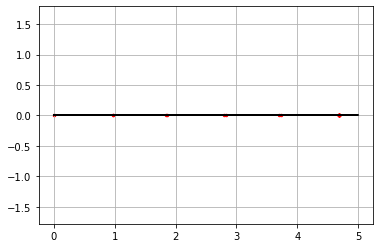

In [18]:
plt.figure()
plt.plot(gt[:,0], gt[:,1], 'k-',ms=2 )
plt.axes().set_aspect("equal","datalim")
for p in poses:
    print(p[0], p[1])
    plt.scatter([p[0]], [p[1]], c= 'r', s=6)
# for q in icp_poses:
#     plt.scatter([q[0]], [q[1]], c= 'b', s=6)
plt.grid()
plt.show()

In [ ]:
poses